c:\Users\taeil\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


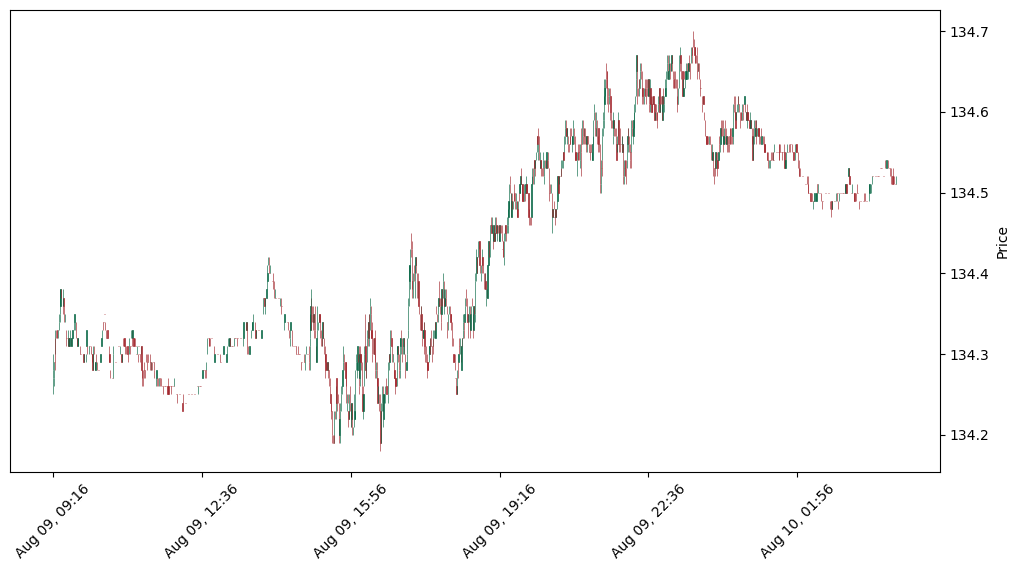

In [148]:
import datetime as dt
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Bund10yr 데이터 및 거래로그 입수
df_1m = pd.read_csv('bund10yr_1m_240810.txt', 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close',
                           'm5','m10','m20','m60','m120','Volume'],
                    thousands=',',
                    skiprows=1)

df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)
df_1m = df_1m.sort_index(ascending=True)

df_tr = pd.read_csv('bund10yr_trade_log_240810.tsv', 
                     delimiter='\t', 
                     thousands=',')

df_tr['진입일시'] = pd.to_datetime(df_tr['진입일시'], format='%Y-%m-%d %H:%M')
df_tr['청산일시'] = pd.to_datetime(df_tr['청산일시'], format='%Y-%m-%d %H:%M')

# Draw candle
# 차트시작 / 종료일시
start = '2024-08-09 09:15'
enddt = '2024-08-10 04:10'
flt = (df_1m.index >= start) & (df_1m.index <= enddt)

fig, ax = plt.subplots(figsize=(12, 6))
mpf.plot(df_1m.loc[flt], type='candle', ax=ax, style='charles')


In [36]:
df_tr.loc[15]

청산일자                 2024-08-08
종목코드                      RXU24
수량                           33
진입구분                         매도
진입가격                     134.24
청산구분                         매수
청산가격                     134.21
청산손익                      990.0
수수료                         132
순손익                       858.0
순손익(KRW)                1290724
진입일시        2024-08-08 21:44:00
청산일시        2024-08-08 21:50:00
손익통화                        EUR
Name: 15, dtype: object

In [119]:

# Bund10yr 데이터 및 거래로그 입수
def read_bund10yr_1m(src):
       df = pd.read_csv(src, 
                    delimiter='\t', 
                    encoding='euc-kr',
                    names=['Date','Open','High','Low','Close',
                           'm5','m10','m20','m60','m120','Volume'],
                    thousands=',',
                    skiprows=1)

       return df


SRC_LST = ['bund10yr_1m_240810.txt',
           'bund10yr_1m_240717.txt',
           'bund10yr_1m_240711.txt',
           'bund10yr_1m_240702.txt',
           'bund10yr_1m_240607.txt',
           ]
df_1m = pd.concat([read_bund10yr_1m(txt) for txt in SRC_LST]).drop_duplicates()
df_1m['Date']=pd.to_datetime(df_1m['Date'], format='%Y/%m/%d,%H:%M')
df_1m.set_index('Date', inplace=True)
df_1m = df_1m.sort_index(ascending=True)


In [120]:
df_1m.index.to_series().agg(['min', 'max', 'count'])
#df_tr['청산일자'].agg(['min', 'max'])


min      2024-05-15 14:45:00
max      2024-08-10 05:00:00
count                  74802
Name: Date, dtype: object

In [192]:

# Bund10yr 거래로그 입수
def read_trade_log(src):
       df = pd.read_csv(src, 
                        delimiter='\t', 
                        thousands=',')       
       df['진입일시'] = pd.to_datetime(df['진입일시'], format='%Y-%m-%d %H:%M')
       df['청산일시'] = pd.to_datetime(df['청산일시'], format='%Y-%m-%d %H:%M')
       df['거래결과'] = df['청산손익'].apply(lambda x: '1익절' if x > 0 else ('2손절' if x < 0 else '3똔똔'))
       return df

 
df_tr = read_trade_log('bund10yr_trade_log_240810.tsv')


In [193]:
df_tr.tail()

,청산일자,종목코드,수량,진입구분,진입가격,청산구분,청산가격,청산손익,수수료,순손익,순손익(KRW),진입일시,청산일시,손익통화,거래결과
463,2024-07-01,RXU24,1,매도,130.87,매수,130.84,30.0,4,26.0,38593,2024-07-01 17:04:00,2024-07-01 17:09:00,EUR,1익절
464,2024-07-01,RXU24,1,매도,130.90,매수,130.87,30.0,4,26.0,38593,2024-07-01 16:59:00,2024-07-01 17:02:00,EUR,1익절
465,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30.0,4,26.0,38593,2024-07-01 15:50:00,2024-07-01 15:50:00,EUR,1익절
466,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30.0,4,26.0,38593,2024-07-01 15:33:00,2024-07-01 15:33:00,EUR,1익절
467,2024-07-01,RXU24,1,매수,131.12,매도,131.15,30.0,4,26.0,38593,2024-07-01 14:59:00,2024-07-01 15:00:00,EUR,1익절


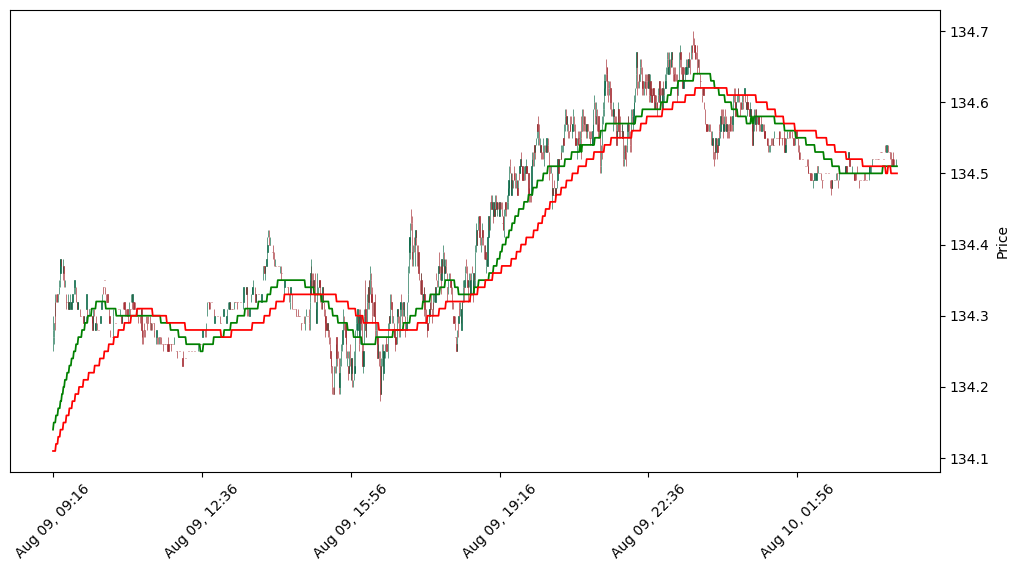

In [130]:

# Draw candle
# 차트시작 / 종료일시
def draw_candle():
       start = '2024-08-09 09:15'
       enddt = '2024-08-10 04:10'
       flt = (df_1m.index >= start) & (df_1m.index <= enddt)
       
       fig, ax = plt.subplots(figsize=(12, 6))
       # 이평선 추가
       mavs = [mpf.make_addplot(df_1m.loc[flt]['m60'], color='g', ax=ax),
              mpf.make_addplot(df_1m.loc[flt]['m120'], color='r', ax=ax)]
       mpf.plot(df_1m.loc[flt], type='candle', ax=ax, style='charles', addplot=mavs)


draw_candle()

In [201]:
df_tr.head(3)

,청산일자,종목코드,수량,진입구분,진입가격,청산구분,청산가격,청산손익,수수료,순손익,순손익(KRW),진입일시,청산일시,손익통화,거래결과
0,2024-08-09,RXU24,35,매도,134.20,매수,134.58,-13300.0,105,-13405.0,-20164337,2024-08-09 16:36:00,2024-08-10 00:12:00,EUR,2손절
1,2024-08-09,RXU24,35,매도,134.24,매수,134.22,700.0,105,595.0,895023,2024-08-09 16:32:00,2024-08-09 16:35:00,EUR,1익절
2,2024-08-09,RXU24,35,매도,134.29,매수,134.28,350.0,105,245.0,368539,2024-08-09 16:04:00,2024-08-09 16:28:00,EUR,1익절


In [208]:
grp = [df_tr['진입일시'].dt.isocalendar().week,
       df_tr['거래결과'],
    #   df_tr['진입일시'].dt.hour,
       df_tr['진입구분'],]


def f(x):
   res = {}
   res['거래회수'] = x['진입구분'].count()
   res['매수_청산손익'] = np.where(x['청산구분']=='매수', x['순손익'], 0).sum()
   res['매도_청산손익'] = np.where(x['청산구분']=='매도', x['순손익'], 0).sum()
   
   return pd.Series(res, index=['거래회수','매수_청산손익','매도_청산손익'])

df_tr.groupby(grp).apply(f).unstack()

#agg(['min', 'max', 'count'])

거래회수         매수_청산손익      매도_청산손익         
진입구분         매도     매수       매도   매수      매도       매수
week 거래결과                                            
27   1익절   23.0   16.0    908.0  0.0     0.0    336.0
     3똔똔    3.0    1.0    -12.0  0.0     0.0     -4.0
28   1익절    8.0   17.0    444.0  0.0     0.0   1180.0
     2손절    5.0    2.0  -1662.0  0.0     0.0   -208.0
     3똔똔    NaN    1.0      NaN  0.0     NaN     -8.0
29   1익절    4.0    3.0    348.0  0.0     0.0     96.0
     2손절    2.0    NaN   -338.0  NaN     0.0      NaN
30   1익절   28.0   16.0   2858.0  0.0     0.0   1148.0
     2손절    3.0    NaN -17064.0  NaN     0.0      NaN
     3똔똔    1.0    NaN    -44.0  NaN     0.0      NaN
31   1익절    6.0   67.0    614.0  0.0     0.0  12612.0
     2손절    4.0    1.0   -224.0  0.0     0.0   -266.0
     3똔똔    NaN    5.0      NaN  0.0     NaN   -176.0
32   1익절   55.0  171.0  13439.0  0.0     0.0  33242.0
     2손절    2.0    9.0 -13867.0  0.0     0.0  -7124.0
     3똔똔    2.0   13.0   -240.0  0.0     0.0   -848.0

In [167]:
flt = df_tr['진입일시'].dt.time == dt.datetime.strptime("17:00:00", '%H:%M:%S').time()
df_tr.loc[flt]


,청산일자,종목코드,수량,진입구분,진입가격,청산구분,청산가격,청산손익,수수료,순손익,순손익(KRW),진입일시,청산일시,손익통화
